#### `Triangularization` of a matrix

Alston Householder came up with a clever way to turn a matrix in to a upper triangular form and thereby, obtaining the QR decomposition

This procedure can be illustrated using a matrix $A\in \mathbf{R}^{4 \times 3}$ where `x` indicates entries that are not necessarily zero

$$A:\begin{bmatrix} \times & \times & \times \\\times & \times & \times\\\times & \times & \times\\\times & \times & \times\end{bmatrix} \rightarrow Q_1A\rightarrow \begin{bmatrix} \times & \times & \times \\ 0& \color{red}{\times} & \times\\ 0 & \color{red}{\times} & \times\\ 0 & \color{red}{\times} & \times\end{bmatrix}\rightarrow Q_2Q_1A\rightarrow\begin{bmatrix} \times & \times & \times \\ 0& \times & \times\\ 0 & 0 & \times\\ 0 & 0 & \times\end{bmatrix}\rightarrow Q_3Q_2Q_1A\rightarrow \begin{bmatrix} \times & \times & \times \\ 0& \times & \times\\ 0 & 0 & \times\\ 0 & 0 & 0\end{bmatrix}$$

where $Q_i\in \mathbf{R}^{4 \times 4}, i=1, 2, 3,$ are `orthogonal` matrices (i.e., $Q_i^{T}=Q_i^{-1}$)

#### `Structure` of $Q_k$

Because left multiplying $Q_k$ would essentially recombine the rows of the (intermediate) $A$, therefore, it is not very difficult to see that each orthogonal matrix should have the following structure for $A\in \mathbf{R}^{m \times n}$

$$Q_k=\begin{bmatrix} I_{(k-1)\times(k-1)} & 0 \\ 0 & F_{(m-k+1)\times(m-k+1)} \end{bmatrix}$$

such that each $Q_k$ will focus on making the pattern correct for the `kth` column of $A$ without destroying the first $(k-1)$ rows in $A$

#### Construction of $F$

In [8]:
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(formatter={'float': '{: 0.4f}'.format})

plt.style.use('dark_background')
# color: https://matplotlib.org/stable/gallery/color/named_colors.htm

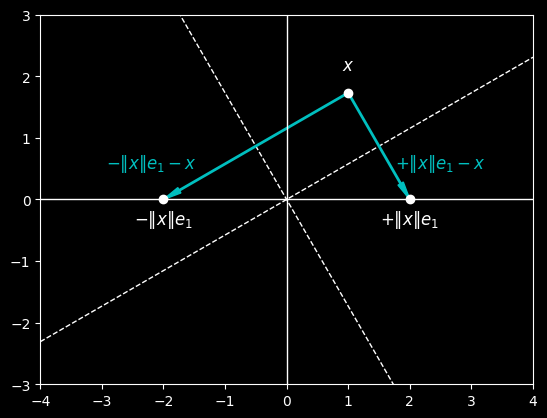

In [9]:
x = np.linspace(-4, 4, 100)
h_1 = 1 / np.sqrt(3)
h_2 = -1 * np.sqrt(3)

plt.plot(x, h_1 * x, color='w', ls='--', linewidth=1)
plt.plot(x, h_2 * x, color='w', ls='--', linewidth=1)
plt.plot([2, 1], [0, np.sqrt(3)], color='c', linewidth=2)
plt.plot([-2, 1], [0, np.sqrt(3)], color='c', linewidth=2)
plt.scatter(1, np.sqrt(3), color='w', zorder=5)
plt.scatter(2, 0, color='w', zorder=5)
plt.scatter(-2, 0, color='w', zorder=5)

plt.text(1, 2.1, '$x$', horizontalalignment='center', fontsize=12, color='w')
plt.text(2, -0.4, '$+\|x\|e_1$', horizontalalignment='center', fontsize=12, color='w')
plt.text(-2, -0.4, '$-\|x\|e_1$', horizontalalignment='center', fontsize=12, color='w')
plt.text(2.5, 0.5, '$+\|x\|e_1-x$', horizontalalignment='center', fontsize=12, color='c')
plt.text(-2.2, 0.5, '$-\|x\|e_1-x$', horizontalalignment='center', fontsize=12, color='c')
plt.arrow(2-0.15, 0+0.15*np.sqrt(3), 0.001, -0.001*np.sqrt(3), head_width=0.1, head_length=0.3, fc='c', ec='c')
plt.arrow(-2+0.45/np.sqrt(3), 0+0.15, -0.001, -0.001/np.sqrt(3), head_width=0.1, head_length=0.3, fc='c', ec='c')

plt.axhline(0, color='w',  linewidth=1)
plt.axvline(0, color='w',  linewidth=1)

plt.ylim(-3, 3)
plt.xlim(-4, 4)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

Let's consider iteration $k$ when we construct $Q_k$

Denote the vector consisting of the final $m-k+1$ entries in the `kth` column of the matrix $A$ as $x$ (for example, the red $\times$ above for $Q_2$)

The Householder triangularization finds the $F$ such that

$$Fx=\pm\|x\|e_1$$

The scaling coefficient of $e_1$, $\pm\|x\|$, reflects the fact that orthogonal matrix `preserves norm`, that is $\|Fx\|=\|\pm\|x\|e_i\|=\|x\|$

Geometrically, the transformation $Fx=\pm\|x\|e_1$ is like doing a `reflection` of $x$ on to the x-axis across a hyperplane

Due to the preservation of norm between $x$ and $Fx$, the seperating hyperplane goes pass the origin

Use the reflection on positive x-axis as example, we recall that the residual of the projection of $x$ on to the plane is

$$\left(I-\frac{vv^T}{v^Tv}\right)x$$

where $v=\|x\|e_i-x$

We see that to make reflection, we need to go twice as far from $x$ along the direction of $v$ and we have

$$Fx=\boxed{\left(I-2\frac{vv^T}{v^Tv}\right) x}$$

For numerical reasons, we often choose the reflection that is `further` from $x$

That is

$$v=\text{sgn}(x_1)\|x\|e_1+x$$

#### Obtain $Q$

Once we sequentially construct $Q_i, i=1, \cdots, n$, we will take care of the triangularization and $A$ would become an `upper triangular` matrix, which is $\begin{bmatrix}R \\ 0\end{bmatrix}$ or $R$

An efficient way to get the `orthogonal` matrix $Q$ is to apply the same sequence of $Q_i$ to the identity matrix and the transformed identity matrix would be the $Q$, as we know $QI=Q$ (it is actually $Q^T$ since we apply $QA=R$ and we need $A=Q^TR$)

This also indicates that the Householder triangularization setup here is always doing `full QR` decomposition

#### Example

In [10]:
def householder(A):
    m, n = A.shape
    R = A.copy()
    Q = np.identity(m)

    for i in range(n):
        x = R[i:, i]
        v = np.sign(x[0]) * np.linalg.norm(x) * np.eye(x.shape[0])[:,0] + x
        v /= np.linalg.norm(v)

        # in textbook the transformation is applied only to columns starting index i, i.e., R[i:, i:]
        # however, since all entries in R[i:, :i] are zero from previous iteration
        # applying transformation to all columns R[i:, :] would not have negative impact
        # of course, for large scale problem, using R[i:, i:] surely can save some computation
        R[i:, :] -= 2 * np.outer(v, v) @ R[i:, :]

        # if Q is needed explicitly
        Q[i:, :] -= 2 * np.outer(v, v) @ Q[i:, :]

    return Q.T, R

In [11]:
mat_list = ['square', 'non-square', 'ill-conditioned', 'identity']
mat = mat_list[1]
epsilon = 1e-8

if mat == 'square':
    A = np.array([[1.0, 2.0, 3.0, 4.0],
                  [4.0, 1.0, 0.0, -1.0],
                  [3.0, 5.0, -2.0, 1.0],
                  [2.0, 0.0, 1.0, 2.0]])
elif mat == 'non-square':
    A = np.array([[1.0, 2.0, 3.0],
                  [4.0, 1.0, 0.0],
                  [3.0, 5.0, -2.0],
                  [2.0, 0.0, 1.0]])
elif mat == 'ill-conditioned':
    A = np.array([[1, 1, 1],
                  [epsilon, 0, 0],
                  [0, epsilon, 0],
                  [0, 0, epsilon]])
elif mat == 'identity':
    A = np.identity(4)

Q, R = householder(A)

print("Orthonormal basis Q:")
print(Q)

print("\nUpper triangular matrix R:")
print(R)

# Verify Q is orthonormal
print(f"\nQ^TQ:\n{np.dot(Q.T, Q)}")
print(f"Norms: \n{np.linalg.norm(Q, axis=0)}")

# Verify that A = QR (full QR)
A_reconstructed = np.dot(Q, R)
print("\nOriginal matrix A:")
print(A)
print("\nReconstructed matrix A from Q and R as full QR:")
print(A_reconstructed)

# To get reduced QR
n = A.shape[1]
A_reduced = np.dot(Q[:, :n], R[:n, :])
print("\nReconstructed matrix A from Q and R as reduced QR:")
print(A_reduced)

Orthonormal basis Q:
[[-0.1826  0.3324  0.9102 -0.1667]
 [-0.7303 -0.4602 -0.0700 -0.5000]
 [-0.5477  0.7414 -0.3501  0.1667]
 [-0.3651 -0.3579  0.2100  0.8333]]

Upper triangular matrix R:
[[-5.4772 -3.8341  0.1826]
 [ 0.0000  3.9115 -0.8437]
 [-0.0000 -0.0000  3.6407]
 [ 0.0000 -0.0000  0.0000]]

Q^TQ:
[[ 1.0000  0.0000 -0.0000  0.0000]
 [ 0.0000  1.0000 -0.0000 -0.0000]
 [-0.0000 -0.0000  1.0000 -0.0000]
 [ 0.0000 -0.0000 -0.0000  1.0000]]
Norms: 
[ 1.0000  1.0000  1.0000  1.0000]

Original matrix A:
[[ 1.0000  2.0000  3.0000]
 [ 4.0000  1.0000  0.0000]
 [ 3.0000  5.0000 -2.0000]
 [ 2.0000  0.0000  1.0000]]

Reconstructed matrix A from Q and R as full QR:
[[ 1.0000  2.0000  3.0000]
 [ 4.0000  1.0000  0.0000]
 [ 3.0000  5.0000 -2.0000]
 [ 2.0000  0.0000  1.0000]]

Reconstructed matrix A from Q and R as reduced QR:
[[ 1.0000  2.0000  3.0000]
 [ 4.0000  1.0000  0.0000]
 [ 3.0000  5.0000 -2.0000]
 [ 2.0000  0.0000  1.0000]]
